In [99]:
import geopandas as gpd
import geodatasets
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from shapely.geometry import Polygon, LineString, MultiPoint, Point

<Axes: >

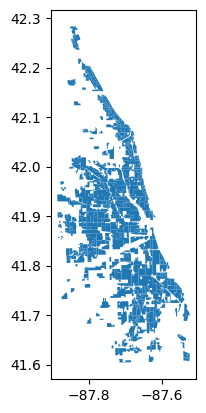

In [7]:
redlining_df = gpd.read_file("../data/ILChicago1940.zip")
redlining_df.plot()

In [34]:
redlining_df

name holc_id holc_grade  \
0     NaN      A1          A   
1     NaN     A10          A   
2     NaN     A11          A   
3     NaN     A12          A   
4     NaN     A13          A   
..    ...     ...        ...   
575   NaN     D95          D   
576   NaN     D96          D   
577   NaN     D97          D   
578   NaN     D98          D   
579   NaN     D99          D   

                                              geometry  
0    POLYGON ((-87.83054 42.25361, -87.83185 42.255...  
1    POLYGON ((-87.76217 42.12934, -87.76209 42.128...  
2    POLYGON ((-87.75082 42.13867, -87.75284 42.140...  
3    POLYGON ((-87.74436 42.12695, -87.74617 42.129...  
4    POLYGON ((-87.75566 42.12410, -87.75356 42.123...  
..                                                 ...  
575  POLYGON ((-87.64331 41.72133, -87.64355 41.726...  
576  POLYGON ((-87.62412 41.72921, -87.62409 41.722...  
577  POLYGON ((-87.61953 41.72961, -87.61821 41.729...  
578  MULTIPOLYGON (((-87.58543 41.72948, -87.58533 ...  
579  POLYGON ((-87.56617 41.73809, -87.56624 41.744...  

[580 rows x 4 columns]

<Axes: >

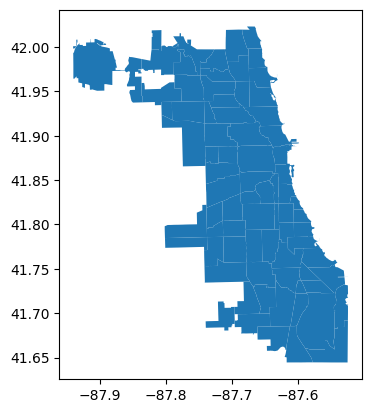

In [19]:
chicago_neighborhoods_df = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))
chicago_neighborhoods_df.plot()

In [26]:
chicago_neighborhoods_df

community  NID  POP2010  POP2000  POPCH   POPPERCH  popplus  popneg  \
0           DOUGLAS   35    18238    26470  -8232 -31.099358        0       1   
1           OAKLAND   36     5918     6110   -192  -3.142390        0       1   
2       FULLER PARK   37     2876     3420   -544 -15.906433        0       1   
3   GRAND BOULEVARD   38    21929    28006  -6077 -21.698922        0       1   
4           KENWOOD   39    17841    18363   -522  -2.842673        0       1   
..              ...  ...      ...      ...    ...        ...      ...     ...   
72  MOUNT GREENWOOD   74    19093    18820    273   1.450584        1       0   
73      MORGAN PARK   75    22544    25226  -2682 -10.631888        0       1   
74            OHARE   76    12756    11956    800   6.691201        1       0   
75        EDGEWATER   77    56521    62198  -5677  -9.127303        0       1   
76      EDISON PARK    9    11187    11259    -72  -0.639488        0       1   

                                             geometry  
0   MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...  
1   MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...  
2   MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ...  
3   MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ...  
4   MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...  
..                                                ...  
72  MULTIPOLYGON (((-87.69646 41.70714, -87.69644 ...  
73  MULTIPOLYGON (((-87.64215 41.68508, -87.64249 ...  
74  MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ...  
75  MULTIPOLYGON (((-87.65456 41.99817, -87.65456 ...  
76  MULTIPOLYGON (((-87.80676 42.00084, -87.80676 ...  

[77 rows x 9 columns]

In [80]:
# import chicago neighborhoods to csv
chicago_neighborhoods_df.to_csv('chicago_neighborhoods.csv', sep=',')

# overlap neigborhoods with redlining map

In [118]:
# save geometric columns as geoseries
redline_coordinates = gpd.GeoSeries(redlining_df['geometry'])
neighborhood_coordinates = gpd.GeoSeries(chicago_neighborhoods_df['geometry'])

# Find overlaps between redlined districts and current day communities
overlapping_df = pd.DataFrame(redline_coordinates.overlaps(neighborhood_coordinates), columns=['overlapping'])
overlapping_gdf = redlining_df.sjoin(chicago_neighborhoods_df, how='inner')

/Users/Hena/Library/Python/3.8/lib/python/site-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


name holc_id holc_grade  \
20    NaN     A28          A   
21    NaN     A29          A   
119   NaN     B54          B   
121   NaN     B56          B   
122   NaN     B57          B   
..    ...     ...        ...   
551   NaN     D73          D   
552   NaN     D74          D   
554   NaN     D76          D   
552   NaN     D74          D   
554   NaN     D76          D   

                                              geometry  index_right  \
20   POLYGON ((-87.75251 41.99056, -87.75600 41.992...           11   
21   POLYGON ((-87.74828 41.98852, -87.74834 41.990...           11   
119  POLYGON ((-87.78742 41.99704, -87.78246 41.997...           11   
121  POLYGON ((-87.76426 41.99623, -87.76253 41.992...           11   
122  POLYGON ((-87.75251 41.99056, -87.75369 41.989...           11   
..                                                 ...          ...   
551  MULTIPOLYGON (((-87.62636 41.81648, -87.62561 ...            3   
552  MULTIPOLYGON (((-87.62014 41.77274, -87.62540 ...            3   
554  POLYGON ((-87.59507 41.81455, -87.59664 41.813...            3   
552  MULTIPOLYGON (((-87.62014 41.77274, -87.62540 ...            1   
554  POLYGON ((-87.59507 41.81455, -87.59664 41.813...            1   

           community  NID  POP2010  POP2000  POPCH   POPPERCH  popplus  popneg  
20       FOREST GLEN   12    18508    18165    343   1.888247        1       0  
21       FOREST GLEN   12    18508    18165    343   1.888247        1       0  
119      FOREST GLEN   12    18508    18165    343   1.888247        1       0  
121      FOREST GLEN   12    18508    18165    343   1.888247        1       0  
122      FOREST GLEN   12    18508    18165    343   1.888247        1       0  
..               ...  ...      ...      ...    ...        ...      ...     ...  
551  GRAND BOULEVARD   38    21929    28006  -6077 -21.698922        0       1  
552  GRAND BOULEVARD   38    21929    28006  -6077 -21.698922        0       1  
554  GRAND BOULEVARD   38    21929    28006  -6077 -21.698922        0       1  
552          OAKLAND   36     5918     6110   -192  -3.142390        0       1  
554          OAKLAND   36     5918     6110   -192  -3.142390        0       1  

[625 rows x 13 columns]

In [123]:
overlapping_gdf.drop(columns=['name', 'geometry', 'index_right']).reset_index(drop=True).to_csv('redlining_per_neighborhood.csv', sep=',', index=False)

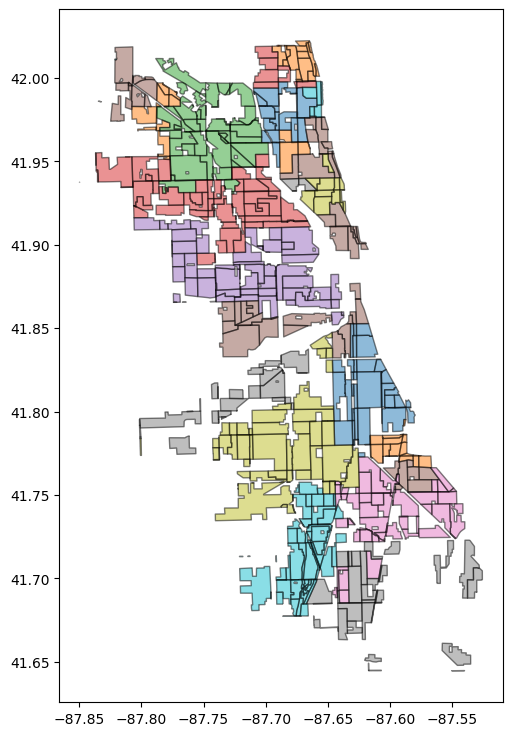

In [111]:
# map the intersection of neighborhoods and redling 
chicago_cores = chicago_neighborhoods_df.overlay(redlining_df, how='intersection')
chicago_cores.plot(alpha=0.5, edgecolor='k', cmap='tab10', figsize=(12, 9));

# connect to postgres (income per neighborhood data)

In [64]:
import psycopg2
import csv

In [132]:
# MUST CREATE CONNECTION to Postgres before any calls are made
pg_conn = psycopg2.connect(
        dbname="postgres",
        user="postgres",
        password="darkdreamer17?",  # change this to your own password
        host="localhost",
        port="5432"
    )
pg_cursor = pg_conn.cursor()


# export dataframes to csv file and import to Postgres 
# income per community
create_income_table = '''
    CREATE TABLE IF NOT EXISTS communitystats(
    CommunityAreaNumber VARCHAR PRIMARY KEY,
    CommunityAreaName VARCHAR(255),
    PercentHousingCrowded DECIMAL(4, 1),
    PercentHouseholdsBelowPoverty DECIMAL(4, 1),
    PercentAged16PlusUnemployed DECIMAL(4, 1),
    PercentAged25PlusNoHighSchoolDiploma DECIMAL(4, 1),
    PercentAgedUnder18OrOver64 DECIMAL(4, 1),
    PerCapitaIncome VARCHAR,
    HardshipIndex VARCHAR
    );
    '''
pg_cursor.execute(create_income_table)


# redlining scores
create_redlining_table = '''
    CREATE TABLE IF NOT EXISTS redlinescores (
    holc_id VARCHAR(5),
    holc_grade text,
    community text,
    NID INT,
    POP2010 INT,
    POP2000 INT,
    POPCH INT,
    POPPERCH NUMERIC(10, 6),
    popplus INT,
    popneg INT
);
    '''
pg_cursor.execute(create_redlining_table)



# Import the CSV data into the table
# communitystats
with open('Per_Capita_Income.csv', 'r', encoding='utf-8-sig') as file:
    next(file)
    pg_cursor.copy_from(file, 'communitystats', sep=',')
    
# redlinescores    
with open('redlining_per_neighborhood.csv', 'r', encoding='utf-8-sig') as file:
    next(file)
    pg_cursor.copy_from(file, 'redlinescores', sep=',')
    
# display tables
pg_cursor.execute('''SELECT * FROM redlinescores WHERE "holc_grade"='D' OR "holc_grade"='F' ''')
print(pg_cursor.fetchall())
    
# Close the PostgreSQL cursor and connection - MUST BE RUN AFTER ANY CALLS TO POSTGRES
if pg_cursor is not None:
    pg_cursor.close()
if pg_conn is not None:
    pg_conn.close()

[('D14', 'D', 'NEAR NORTH SIDE', 8, 80484, 72811, 7673, Decimal('10.538243'), 1, 0), ('D15', 'D', 'NEAR NORTH SIDE', 8, 80484, 72811, 7673, Decimal('10.538243'), 1, 0), ('D30', 'D', 'NEAR NORTH SIDE', 8, 80484, 72811, 7673, Decimal('10.538243'), 1, 0), ('D31', 'D', 'NEAR NORTH SIDE', 8, 80484, 72811, 7673, Decimal('10.538243'), 1, 0), ('D106', 'D', 'BEVERLY', 72, 20034, 21992, -1958, Decimal('-8.903237'), 0, 1), ('D107', 'D', 'BEVERLY', 72, 20034, 21992, -1958, Decimal('-8.903237'), 0, 1), ('D91', 'D', 'BEVERLY', 72, 20034, 21992, -1958, Decimal('-8.903237'), 0, 1), ('D77', 'D', 'HYDE PARK', 41, 25681, 29920, -4239, Decimal('-14.167781'), 0, 1), ('D76', 'D', 'KENWOOD', 39, 17841, 18363, -522, Decimal('-2.842673'), 0, 1), ('D89', 'D', 'SOUTH SHORE', 43, 49767, 61556, -11789, Decimal('-19.151667'), 0, 1), ('D90', 'D', 'SOUTH SHORE', 43, 49767, 61556, -11789, Decimal('-19.151667'), 0, 1), ('D72', 'D', 'GREATER GRAND CROSSING', 69, 32602, 38619, -6017, Decimal('-15.580414'), 0, 1), ('D73',